Завдання №1

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Шлях до файлу з даними
file_path = "hayes-roth.data"

# Задайте імена колонок
column_names = ["name", "hobby", "age", "educational level", "marital status", "class"]

# Завантажте дані у DataFrame
data = pd.read_csv(file_path, names=column_names)

# Подивимося на перші декілька рядків даних
print(data.head())

# Розділимо дані на X (характеристики) та Y (цільова змінна/клас)
X = data.drop(columns=['class'])
y = data['class']

# Виведемо описову статистику датасету
print(data.describe())

# Виведемо кількість елементів у кожному класі
print(data['class'].value_counts())

# Поділимо дані на навчальну та тестову вибірки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Перевіримо розміри отриманих вибірок
print("Розмір навчальної вибірки X:", X_train.shape)
print("Розмір навчальної вибірки Y:", y_train.shape)
print("Розмір тестової вибірки X:", X_test.shape)
print("Розмір тестової вибірки Y:", y_test.shape)
print("Розмір навчальної вибірки:", X_train.shape[0])
print("Розмір тестової вибірки:", X_test.shape[0])


   name  hobby  age  educational level  marital status  class
0    92      2    1                  1               2      1
1    10      2    1                  3               2      2
2    83      3    1                  4               1      3
3    61      2    4                  2               2      3
4   107      1    1                  3               4      3
             name       hobby         age  educational level  marital status  \
count  132.000000  132.000000  132.000000         132.000000      132.000000   
mean    66.500000    2.000000    1.954545           1.954545        1.954545   
std     38.249183    0.819607    0.947988           0.947988        0.947988   
min      1.000000    1.000000    1.000000           1.000000        1.000000   
25%     33.750000    1.000000    1.000000           1.000000        1.000000   
50%     66.500000    2.000000    2.000000           2.000000        2.000000   
75%     99.250000    3.000000    2.000000           2.000000        

Завдання №2

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Стандартизація даних
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Застосуємо kNN з різними значеннями k та метриками відстані
k_values = [3, 5]
metrics = ['euclidean', 'manhattan']

for k in k_values:
    for metric in metrics:
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric)
        knn.fit(X_train_scaled, y_train)
        y_pred = knn.predict(X_test_scaled)
        accuracy = accuracy_score(y_test, y_pred)
        print(f"k={k}, метрика={metric}: Точність = {accuracy}")

# Визначимо оптимальне значення k за допомогою GridSearchCV
param_grid = {'n_neighbors': [3, 5, 7, 9, 11], 'metric': ['euclidean', 'manhattan']}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)
print("Найкращі параметри:", grid_search.best_params_)
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Оптимальне значення k:", accuracy)


k=3, метрика=euclidean: Точність = 0.425
k=3, метрика=manhattan: Точність = 0.575
k=5, метрика=euclidean: Точність = 0.45
k=5, метрика=manhattan: Точність = 0.475
Найкращі параметри: {'metric': 'manhattan', 'n_neighbors': 3}
Оптимальне значення k: 0.575


Завдання №3

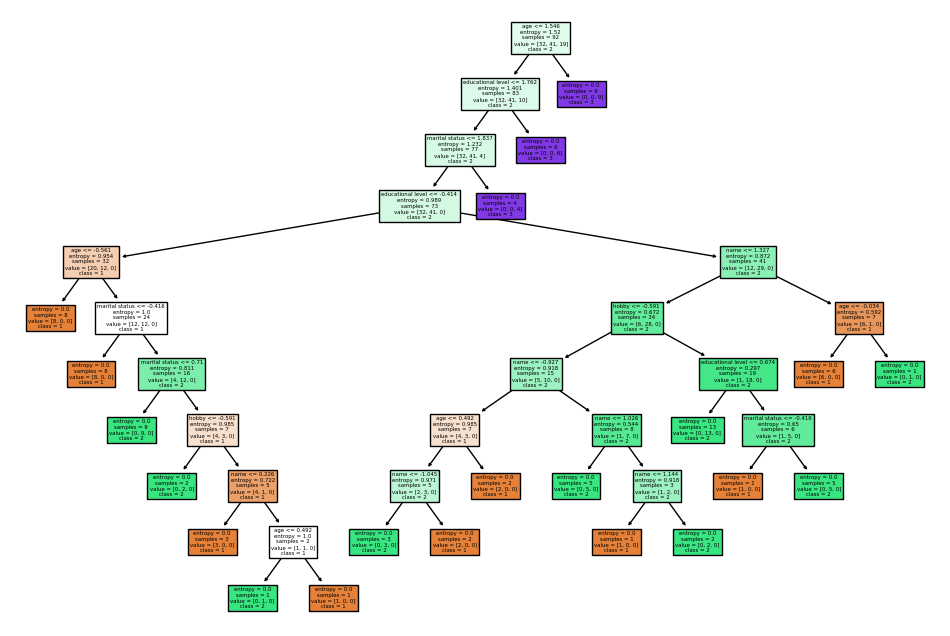

Точність класифікації з критерієм ентропії: 0.675


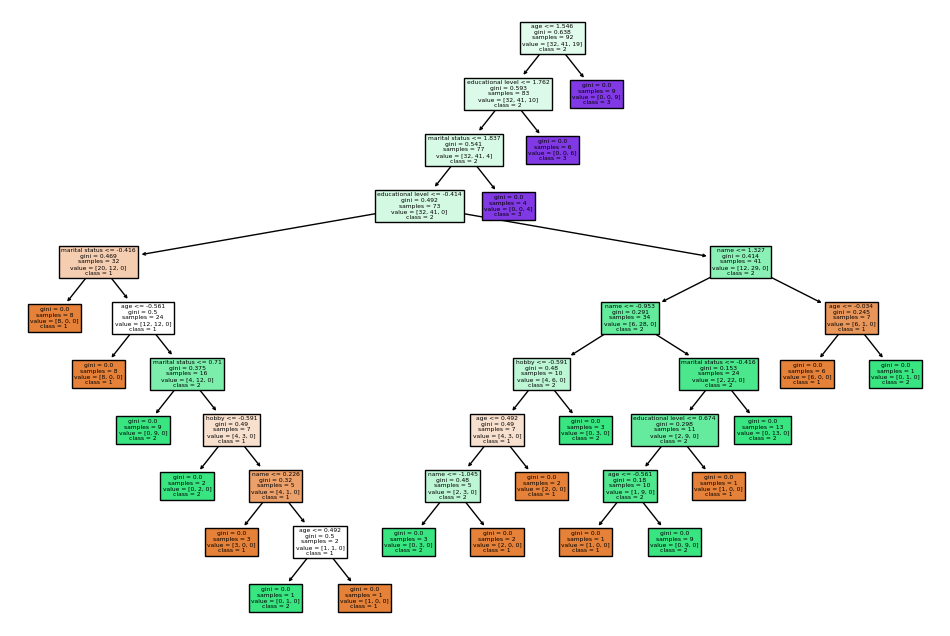

Точність класифікації з критерієм gini: 0.775
Найкращі параметри: {'max_depth': 9, 'max_features': 4}
Точність класифікації з оптимальними параметрами: 0.7


In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
# Стандартизація даних
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Застосуємо алгоритм дерева рішень з критерієм ентропії
tree_entropy = DecisionTreeClassifier(criterion='entropy')
tree_entropy.fit(X_train_scaled, y_train)
accuracy_entropy = tree_entropy.score(X_test_scaled, y_test)

# Візуалізуємо дерево з критерієм ентропії
plt.figure(figsize=(12, 8))
plot_tree(tree_entropy, filled=True, feature_names=column_names[:-1], class_names=[str(c) for c in tree_entropy.classes_])
plt.show()


print("Точність класифікації з критерієм ентропії:", accuracy_entropy)

# Застосуємо алгоритм дерева рішень з критерієм gini
tree_gini = DecisionTreeClassifier(criterion='gini')
tree_gini.fit(X_train_scaled, y_train)
accuracy_gini = tree_gini.score(X_test_scaled, y_test)

# Візуалізуємо дерево з критерієм gini
plt.figure(figsize=(12, 8))
plot_tree(tree_gini, filled=True, feature_names=column_names[:-1], class_names=[str(c) for c in tree_gini.classes_])
plt.show()


print("Точність класифікації з критерієм gini:", accuracy_gini)

# Визначимо оптимальну кількість характеристик в моделі та глибину дерева за допомогою GridSearchCV
param_grid = {'max_features': range(1, len(column_names)), 'max_depth': range(1, 11)}
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)
print("Найкращі параметри:", grid_search.best_params_)
best_tree = grid_search.best_estimator_
accuracy_best = best_tree.score(X_test_scaled, y_test)
print("Точність класифікації з оптимальними параметрами:", accuracy_best)



Завдання №5

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Застосовуємо алгоритм логістичної регресії з різними оптимізаторами
solvers = ['liblinear', 'newton-cg', 'lbfgs']
for solver in solvers:
    # Ініціалізуємо модель з поточним оптимізатором
    lr_model = LogisticRegression(solver=solver, multi_class='auto')
    # Тренуємо модель
    lr_model.fit(X_train_scaled, y_train)
    # Робимо передбачення на тестових даних
    y_pred = lr_model.predict(X_test_scaled)
    # Оцінюємо результати за допомогою оціночних критеріїв
    print(f"Оптимізатор: {solver}")
    print(classification_report(y_test, y_pred))
    # Будуємо матрицю невідповідностей
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Матриця невідповідностей:")
    print(conf_matrix)




Оптимізатор: liblinear
              precision    recall  f1-score   support

           1       0.77      0.53      0.62        19
           2       0.35      0.60      0.44        10
           3       0.90      0.82      0.86        11

    accuracy                           0.62        40
   macro avg       0.67      0.65      0.64        40
weighted avg       0.70      0.62      0.64        40

Матриця невідповідностей:
[[10  9  0]
 [ 3  6  1]
 [ 0  2  9]]
Оптимізатор: newton-cg
              precision    recall  f1-score   support

           1       0.91      0.53      0.67        19
           2       0.42      0.80      0.55        10
           3       0.90      0.82      0.86        11

    accuracy                           0.68        40
   macro avg       0.74      0.71      0.69        40
weighted avg       0.78      0.68      0.69        40

Матриця невідповідностей:
[[10  9  0]
 [ 1  8  1]
 [ 0  2  9]]
Оптимізатор: lbfgs
              precision    recall  f1-score   s

Завдання №6

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Застосовуємо алгоритм SVM з різними ядрами
kernels = ['rbf', 'linear', 'sigmoid']
for kernel in kernels:
    # Ініціалізуємо модель з поточним ядром
    svm_model = SVC(kernel=kernel)
    # Тренуємо модель
    svm_model.fit(X_train_scaled, y_train)
    # Робимо передбачення на тестових даних
    y_pred = svm_model.predict(X_test_scaled)
    # Оцінюємо результати за допомогою оціночних критеріїв
    print(f"Ядро: {kernel}")
    print(classification_report(y_test, y_pred))
    # Будуємо матрицю невідповідностей
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Багатокласова матриця невідповідностей:")
    print(conf_matrix)


Ядро: rbf
              precision    recall  f1-score   support

           1       0.69      0.47      0.56        19
           2       0.41      0.70      0.52        10
           3       1.00      0.91      0.95        11

    accuracy                           0.65        40
   macro avg       0.70      0.69      0.68        40
weighted avg       0.71      0.65      0.66        40

Багатокласова матриця невідповідностей:
[[ 9 10  0]
 [ 3  7  0]
 [ 1  0 10]]
Ядро: linear
              precision    recall  f1-score   support

           1       0.77      0.53      0.62        19
           2       0.35      0.60      0.44        10
           3       0.90      0.82      0.86        11

    accuracy                           0.62        40
   macro avg       0.67      0.65      0.64        40
weighted avg       0.70      0.62      0.64        40

Багатокласова матриця невідповідностей:
[[10  9  0]
 [ 3  6  1]
 [ 0  2  9]]
Ядро: sigmoid
              precision    recall  f1-score   s

Завдання №7

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Ініціалізуємо моделі
knn_model = KNeighborsClassifier(n_neighbors=3)
tree_model = DecisionTreeClassifier(criterion='entropy')
lr_model = LogisticRegression(solver='liblinear', multi_class='auto')
svm_model = SVC(kernel='rbf')

# Тренуємо моделі
knn_model.fit(X_train_scaled, y_train)
tree_model.fit(X_train_scaled, y_train)
lr_model.fit(X_train_scaled, y_train)
svm_model.fit(X_train_scaled, y_train)

# Робимо передбачення
knn_pred = knn_model.predict(X_test_scaled)
tree_pred = tree_model.predict(X_test_scaled)
lr_pred = lr_model.predict(X_test_scaled)
svm_pred = svm_model.predict(X_test_scaled)

# Оцінюємо результати за допомогою оціночних критеріїв
models = {
    'kNN': knn_pred,
    'Decision Tree': tree_pred,
    'Logistic Regression': lr_pred,
    'SVM': svm_pred
}

for model_name, y_pred in models.items():
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    print(f"Модель: {model_name}")
    print(f"Точність: {accuracy}")
    print(f"Відзначення: {precision}")
    print(f"Чутливість: {recall}")
    print(f"Макро-F1: {f1}")
    print()


Модель: kNN
Точність: 0.425
Відзначення: 0.6117424242424242
Чутливість: 0.4185007974481659
Макро-F1: 0.39899267399267396

Модель: Decision Tree
Точність: 0.675
Відзначення: 0.7403508771929825
Чутливість: 0.7403508771929825
Макро-F1: 0.7011494252873564

Модель: Logistic Regression
Точність: 0.625
Відзначення: 0.6740573152337858
Чутливість: 0.6481658692185008
Макро-F1: 0.6421957671957672

Модель: SVM
Точність: 0.65
Відзначення: 0.7013574660633485
Чутливість: 0.6942583732057416
Макро-F1: 0.6777998236331569

